# Synthetic complex model

This notebook creates a model simulating an complex with magnetization using the poligonal prisms from fatiando and save its parameters in an outer file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
from fatiando import utils
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

### Auxiliary functions

In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Creating the model

In [3]:
model = dict()

In [4]:
# model parameters
model['M'] = 30 # number of vertices per prism
model['L'] = 10 # number of prisms
model['P'] = model['L']*(model['M']+2) # number of parameters

model['z0'] = 130.    # depth of the top the shallowest prism
model['dz'] = 600.    # thickness of each prism

model['inc'] = -50.  # inclination
model['dec'] = 9.   # declination
model['intensity'] = 12. # intensity

model['props']={'magnetization': utils.ang2vec(
    model['intensity'], model['inc'], model['dec'])} # physical property: magnetization

#ri = np.linspace(1000., 200., model['M']*model['L']) # radial distance for each vertice
#rand = np.random.uniform(0.8, 1., model['M']*model['L'])
#r = ri*rand

#r = np.random.uniform(low=400., high=700., size=model['M'])
r = np.array([ 513.8863825 ,  608.66242761,  608.66242761,  639.21917548,
                554.40019092,  651.54224441,  666.06947764,  666.06947764,
                568.66501881,  568.66501881,  625.57161505,  625.57161505,
                522.11037285,  522.11037285,  542.90744237,  542.90744237,
                405.92270651,  405.92270651,  549.6901502 ,  636.54706803,
                551.61570786,  582.77644177,  582.77644177,  582.77644177,
                464.08301193,  464.08301193,  407.89472325,  407.98706731,
                407.98706731,  407.98706731])
rs = []
#r = np.zeros((model['L'],1),dtype=r.dtype) + r
#r = np.repeat(r[None],model['M'],axis=0)

scale = np.array([1.2, 1.4, 1.6, 1., 1.,
                  0.7, 0.6, 2., 2.2, 2.2])

for i in range(model['L']):
    rs.append(r*scale[i])

In [5]:
# Cartesian coordinates of the origin of each prism
x0 = np.linspace(-250., 750., model['L'])
y0 = np.linspace(250., -750., model['L'])
#y0 = np.sqrt(1500.**2. - (x0 - 1000.)**2.) - 500.
l = []   # list of parameters of the prisms

for i, (r, x, y) in enumerate(zip(rs, x0, y0)):
    l.append([r, x, y,
             model['z0'] + model['dz']*i,
             model['z0'] + model['dz']*(i + 1),
              model['props']])

#for i in range(model['L']):
#    l.append([r*(-150.*i*i/11. + 3150.*i/11. + 500.), x0[i], y0[i], model['z0'] + model['dz']*i,\
#          model['z0'] + model['dz']*(i + 1), model['props']])

model['prisms'] = mfun.pol2cart(l, model['M'], model['L'])
model['param_vec'] = mfun.param_vec(l, model['M'], model['L'])

### Model ploting

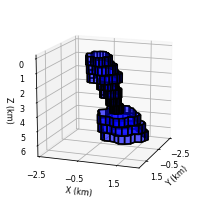

In [7]:
verts = mfun.plot_prisms(model['prisms'], scale=0.001)

fig = plt.figure(figsize=(3.33,3.33))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, 
alpha=0.4, facecolor='b', linewidths=1.5, edgecolors='k'))

ax.set_xlim(-2.5, 2.5, 100)
ax.set_ylim(-2.5, 2.5, 100)
ax.set_zlim(model['prisms'][-1].z2/1000.+0.5, -0.1, 100)
ax.tick_params(labelsize= 8, pad=2)
ax.set_xlabel('Y (km)', fontsize= 8, labelpad=0)
ax.set_ylabel('X (km)', fontsize= 8, labelpad=0)
ax.set_zlabel('Z (km)', fontsize= 8, labelpad=-2)
ax.set_xticks(np.arange(-2.5, 3.5, 2))
ax.set_yticks(np.arange(-2.5, 3.5, 2))
ax.set_zticks(np.arange(0, 7, 1))
ax

ax.view_init(15, 20)

plt.savefig('model.png', dpi=1200)
plt.show()

### Saving in an outer file

In [8]:
file_name = 'model.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model, f)